# 2. Temporal Dynamics and Optical Flow

**Project:** Video EDA
**Goal:** Visualize motion ! We will use Dense Optical Flow to see where pixels are moving between frames.

---

## 1. Imports

In [1]:
import imageio.v3 as iio
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(f"OpenCV Version: {cv2.__version__}")

OpenCV Version: 4.11.0


## 2. Load Video
Using the same sample video.

In [2]:
video_frames = iio.imread('imageio:cockatoo.mp4')
n_frames, height, width, _ = video_frames.shape

## 3. Frame Differencing
The simplest motion detection: Frame $t$ minus Frame $t-1$.

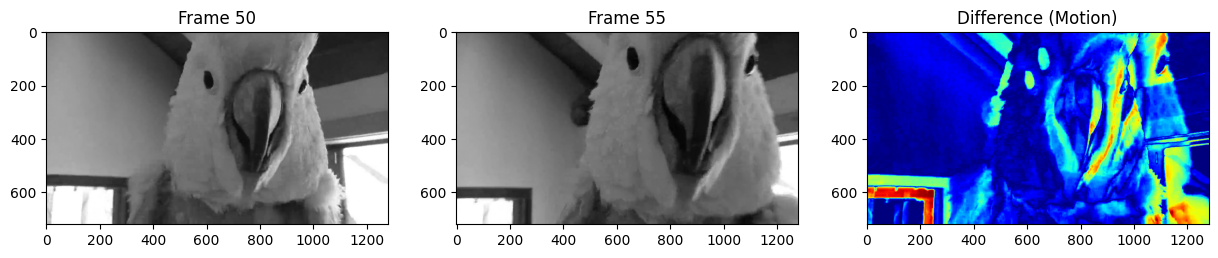

In [3]:
# Convert two consecutive frames to grayscale
frame1 = cv2.cvtColor(video_frames[50], cv2.COLOR_RGB2GRAY)
frame2 = cv2.cvtColor(video_frames[55], cv2.COLOR_RGB2GRAY)

diff = cv2.absdiff(frame1, frame2)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(frame1, cmap='gray'); plt.title('Frame 50')
plt.subplot(1, 3, 2); plt.imshow(frame2, cmap='gray'); plt.title('Frame 55')
plt.subplot(1, 3, 3); plt.imshow(diff, cmap='jet'); plt.title('Difference (Motion)')
plt.show()

## 4. Dense Optical Flow (Farneback)
Computing the flow vectors for *every* pixel. This gives us direction and magnitude of motion.

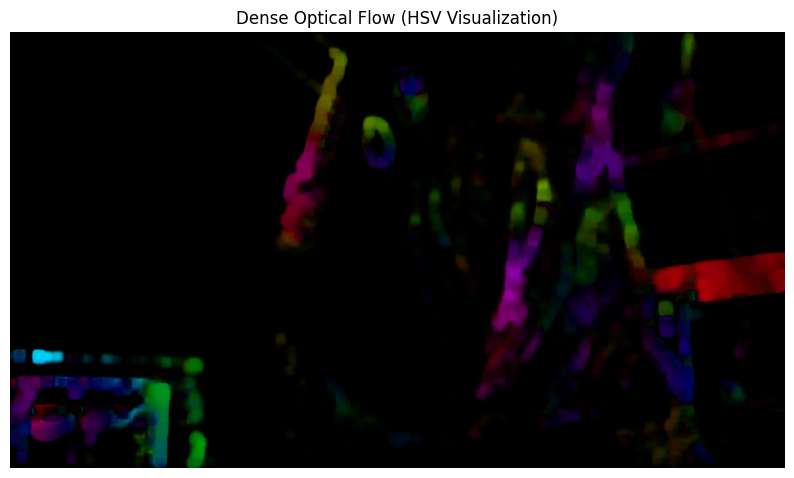

In [4]:
flow = cv2.calcOpticalFlowFarneback(frame1, frame2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Compute magnitude and angle of the flow vectors
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

# Visualization: Hue = Direction, Value = Magnitude
hsv = np.zeros((height, width, 3), dtype=np.uint8)
hsv[..., 1] = 255
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

rgb_flow = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(rgb_flow)
plt.title('Dense Optical Flow (HSV Visualization)')
plt.axis('off')
plt.show()